In [1]:
# set up
import pandas as pd
# !pip install yfinance
import yfinance as yf

In [2]:
# Now we have a company list, we can use this to scrape the stock price.
Company_list = pd.read_csv("Company_list.csv")

# show the data type of Company list
print(type(Company_list))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# drop the duplicate company. Cause we want to get a company list to scrape
unique_company = Company_list.drop_duplicates(subset = 'Company')

print(len(unique_company))

322


In [4]:
print(unique_company.head(5))

          Company
0             AMD
1        AppLovin
2           Chegg
3  Enphase Energy
4         23andMe


In [5]:
# In order to scrape yahoo finance, we have to create a mapping
company_to_ticker = {
    "AMD": "AMD",
    "AppLovin": "APP",
    "Chegg": "CHGG",
    "Enphase Energy": "ENPH",
    "23andMe": "ME",
    "Freshworks": "FRSH",
    "Opendoor": "OPEN",
    "Akamai": "AKAM",
    "iRobot": "IRBT",
    "Dropbox": "DBX",
    "F5": "FFIV",
    "Coursera": "COUR",
    "Upwork": "UPWK",
    "Nikola": "NKLA",
    "PubMatic": "PUBM",
    "Zapata Computing": "ZPTA",
    "Olo": "OLO",
    "Luminar": "LAZR",
    "Microsoft": "MSFT",
    "Udemy": "UDMY",
    "Lyft": "LYFT",
    "Apple": "AAPL",
    "Velo3D": "VLD",
    "Redfin": "RDFN",
    "Five9": "FIVN",
    "GoPro": "GPRO",
    "AppLovin": "APP",
    "Sonos": "SONO",
    "Grail": "GRAL",
    "Cisco": "CSCO",
    "Fastly": "FSLY",
    "Eventbrite": "EB",
    "LegalZoom": "LZ",
    "Teradata": "TDC",
    "Intel": "INTC",
    "IAC": "IAC",
    "SoFi": "SOFI",
    "Nevro": "NVRO",
    "Rent the Runway": "RENT",
    "Unity": "U",
    "NuScale Power": "SMR",
    "MeridianLink": "MLNK",
    "NanoString Technologies": "NSTG",
    "Cue Health": "HLTH",
    "Xerox": "XRX",
    "Intel": "INTC",
    "Kaspien": "KSPN",
    "Enphase Energy": "ENPH",
    "eBay": "EBAY",
    "Invitae": "NVTA",
    "Etsy": "ETSY",
    "Analog Devices": "ADI",
    "SmileDirectClub": "SDC",
    "Rivian": "RIVN",
    "Bill.com": "BILL",
    "TuSimple": "TSP",
    "Twilio": "TWLO",
    "Domo": "DOMO",
    "Unity": "U",
    "Presto": "PRST",
    "Singular Genomics": "OMIC",
    "Chewy": "CHWY",
    "Sarcos": "STRC",
    "Amazon": "AMZN",
    "TripAdvisor": "TRIP",
    "Snap": "SNAP",
    "BigCommerce": "BIGC",
    "Oportun": "OPRT",
    "Zillow": "Z",
    "Nextdoor": "KIND",
    "F5": "FFIV",
    "Viasat": "VSAT",
    "Beyond Meat": "BYND",
    "Informatica": "INFA",
    "Splunk": "SPLK",
    "Hippo Insurance": "HIPO",
    "LegalZoom": "LZ",
    "Google": "GOOG",
    "Expedia": "EXPE",
    "Qualcomm": "QCOM",
    "Lending Club": "LC",
    "MariaDB": "MRDB",
    "Stitch Fix": "SFIX",
    "Juniper Networks": "JNPR",
    "Shift": "SFT",
    "Enovix": "ENVX",
    "IronNet": "IRNT",
    "Snap": "SNAP",
    "Roblox": "RBLX",
    "Cisco": "CSCO",
    "Sage Therapeutics": "SAGE",
    "Google": "GOOG",
    "Akili Labs": "AKLI",
    "Roku": "ROKU",
    "iSpecimen": "ISPC",
    "Absci": "ABSI",
    "Pegasystems": "PEGA",
    "Zebra Technologies": "ZBRA",
    "BlackLine": "BL",
    "Illumina": "ILMN",
    "AppFolio": "APPF",
    "Intel": "INTC",
    "SecureWorks": "SCWX",
    "Shutterfly": "SFLY",
    "Blend": "BLND",
    "Thoughtworks": "TWKS",
    "Rapid7": "RPD",
    "Doximity": "DOCS",
    "23andMe": "ME",
    "Astra": "ASTR",
    "Planet": "PL",
    "Wish": "WISH",
    "AppHarvest": "APPH",
    "Inspirato": "ISPO",
    "Blue Apron": "APRN",
    "Microsoft": "MSFT",
    "Sarcos": "STRC",
    "Amazon": "AMZN",
    "Tempo Automation": "TMPO",
    "Peloton": "PTON",
    "Bark": "BARK",
    "Stitch Fix": "SFIX",
    "Freightos": "CRGO",
    "Matterport": "MTTR",
    "Everquote": "EVER",
    "Butterfly Network": "BFLY",
    "Shift": "SFT",
    "Latch": "LTCH",
    "Amdocs": "DOX",
    "New Relic": "NEWR",
    "Lordstown Motors": "RIDE",
    "Payoneer": "PAYO",
    "Robinhood": "HOOD",
    "Uber": "UBER",
    "Nikola": "NKLA",
    "Qualcomm": "QCOM",
    "Sonos": "SONO",
    "TrueCar": "TRUE",
    "Olo": "OLO",
    "Western Digital": "WDC",
    "Chegg": "CHGG",
    "23andMe": "ME",
    "HashiCorp": "HCP",
    "Coherent": "COHR",
    "Edgio": "EGIO",
    "Unity": "U",
    "ZoomInfo": "ZI",
    "Outbrain": "OB",
    "SentinelOne": "S",
    "ZipRecruiter": "ZIP",
    "DHI Group": "DHX",
    "AppFolio": "APPF",
    "TuSimple": "TSP",
    "Lemonade": "LMND",
    "CS Disco": "LAW",
    "Microsoft": "MSFT",
    "Similarweb": "SMWB",
    "Akamai": "AKAM",
    "Marqeta": "MQ",
    "Twist Bioscience": "TWST",
    "Sabre": "SABR",
    "Unity": "U",
    "Upwork": "UPWK",
    "Brightcove": "BCOV",
    "Cue Health": "HLTH",
    "Dropbox": "DBX",
    "Alteryx": "AYX",
    "Vroom": "VRM",
    "Lyft": "LYFT",
    "BuzzFeed": "BZFD",
    "F5": "FFIV",
    "WalkMe": "WKME",
    "Opendoor": "OPEN",
    "Viasat": "VSAT",
    "Science 37": "SNCE",
    "Medtronic": "MDT",
    "Redfin": "RDFN",
    "Pear Therapeutics": "PEAR",
    "Amplitude": "AMPL",
    "View": "VIEW",
    "Roku": "ROKU",
    "LendingTree": "TREE",
    "Electronic Arts": "EA",
    "Seagate": "STX",
    "iCAD": "ICAD",
    "Shift": "SFT",
    "Lucid Motors": "LCID",
    "AEye": "LIDR",
    "Better Therapeutics": "BTTX",
    "Marvell": "MRVL",
    "Amazon": "AMZN",
    "Freshworks": "FRSH",
    "Coherent": "COHR",
    "Leafly": "LFLY",
    "Boxed": "BOXD",
    "Meta": "META",
    "Samsung": "005930.KS",
    "Neoleukin Therapeutics": "NLTX",
    "SiriusXM": "SIRI",
    "Embark Trucks": "EMBK",
    "Airbnb": "ABNB",
    "Zscaler": "ZS",
    "Thoughtworks": "TWKS",
    "Sonder": "SOND",
    "Electronic Arts": "EA",
    "Eventbrite": "EB",
    "MeridianLink": "MLNK",
    "Palantir": "PLTR",
    "Twitter": "TWTR",
    "Lucira Health": "LHDX",
    "EQRx": "EQRX",
    "EVgo": "EVGO",
    "TaskUs": "TASK",
    "Micron": "MU",
    "DocuSign": "DOCU",
    "The RealReal": "REAL",
    "Smartsheet": "SMAR",
    "DigitalOcean": "DOCN",
    "Sprinklr": "CXM",
    "Momentive": "MNTV",
    "Vicarious Surgical": "RBOT",
    "Blackbaud": "BLKB",
    "Udemy": "UDMY",
    "Twilio": "TWLO",
    "Rigetti Computing": "RGTI",
    "Oportun": "OPRT",
    "GitLab": "GTLB",
    "Bark": "BARK",
    "GoDaddy": "GDDY",
    "Affirm": "AFRM",
    "Zoom": "ZM",
    "eBay": "EBAY",
    "SecureWorks": "SCWX",
    "Dell": "DELL",
    "Okta": "OKTA",
    "Autodesk": "ADSK",
    "Getaround": "GETR",
    "Splunk": "SPLK",
    "Pinterest": "PINS",
    "DraftKings": "DKNG",
    "Cyren": "CYRN",
    "Appgate": "APGT",
    "Frequency Therapy": "FREQ",
    "Match Group": "MTCH",
    "Rivian": "RIVN",
    "PayPal": "PYPL",
    "NetApp": "NTAP",
    "Workday": "WDAY",
    "HubSpot": "HUBS",
    "Upstart": "UPST",
    "Wish": "WISH",
    "National Instruments": "NATI",
    "Groupon": "GRPN",
    "Intel": "INTC",
    "BM Technologies": "BMTX",
    "Quantum SI": "QSI",
    "Synopsys": "SNPS",
    "Confluent": "CFLT",
    "IBM": "IBM",
    "Lam Research": "LRCX",
    "Guardant Health": "GH",
    "Vacasa": "VCSA",
    "PagerDuty": "PD",
    "Innovid": "CTV",
    "Yext": "YEXT",
    "Google": "GOOG",
    "Wayfair": "W",
    "Capital One": "COF",
    "Proterra": "PTRA",
    "WeWork": "WE",
    "CS Disco": "LAW",
    "Magnite": "MGNI",
    "Personalis": "PSNL",
    "Microsoft": "MSFT",
    "Teladoc Health": "TDOC",
    "Vroom": "VRM",
    "8x8": "EGHT",
    "Inspirato": "ISPO",
    "nCino": "NCNO",
    "Starry": "STRY",
    "Bally's Interactive": "BALY", # Bally's Interactive 作为母公司 Bally's Corporation 的一部分，并未单独上市，没有独立的股票代码。
    "Lucid Diagnostics": "LUCD",
    "Unity": "U",
    "RingCentral": "RNG",
    "LiveVox": "LVOX",
    "Lending Club": "LC",
    "Definitive Health": "DH",
    "Akili Labs": "AKLI",
    "Life360": "360.AX", 
    "Qualtrics": "XM",
    "HashiCorp": "HCP",
    "Coinbase": "COIN",
    "Informatica": "INFA",
    "Blend": "BLND",
    "Fate Therapeutics": "FATE",
    "Avaya": "AVYA",
    "Match Group": "MTCH",
    "NerdWallet": "NRDS",
    "Salesforce": "CRM",
    "Intuit": "INTU",
    "UIPath": "PATH",
    "Planet": "PL",
    "Ginkgo Bioworks": "DNA",
    "Wex": "WEX",
    "Fisker": "FSR",
    "Chegg": "CHGG",
    "Yext": "YEXT",
    "Microsoft": "MSFT",
    "Google": "GOOG",
    "Lucid Motors": "LCID",
    "Cue Health": "HLTH",
    "Rivian": "RIVN",
    "Google": "GOOG",
    "Vacasa": "VCSA",
    "Enovix": "ENVX",
    "Editas Medicine": "EDIT",
    "WalkMe": "WKME",
    "Cue": "HLTH",
    "SoundHound": "SOUN",
    "Twitter": "TWTR",
    "Stitch Fix": "SFIX",
    "TCR2": "TCRR",
    "Amazon": "AMZN",
    "Salesforce": "CRM",
    "Kaltura": "KLTR",
    "Butterfly Network": "BFLY",
    "Vimeo": "VMEO",
    "Pegasystems": "PEGA",
    "Amdocs": "DOX",
    "Micron": "MU",
    "Qualcomm": "QCOM",
    "TuSimple": "TSP",
    "BigCommerce": "BIGC",
    "Freshworks": "FRSH",
    "Quanergy Systems": "QNGY",
    "Edgio": "EGIO",
    "Viant": "DSP",
    "TechTarget": "TTGT",
    "Bakkt": "BKKT",
    "Blue Apron": "APRN",
    "Nerdy": "NRDY",
    "Doma": "DOMA",
    "Intel": "INTC",
    "BuzzFeed": "BZFD",
    "Adobe": "ADBE",
    "Zuora": "ZUO",
    "Springbig": "SBIG",
    "SQZ Biotech": "SQZ",
    "Synlogic": "SYBX",
    "DoorDash": "DASH",
    "Elastic": "ESTC",
    "Codexis": "CDXS",
    "Western Digital": "WDC",
    "Carvana": "CVNA",
    "Roku": "ROKU",
    "Homepoint": "HMPT",
    "Amazon": "AMZN",
    "Cisco": "CSCO",
    "Similarweb": "SMWB",
    "Pear Therapeutics": "PEAR",
    "UiPath": "PATH",
    "Asana": "ASAN",
    "Rubicon Technologies": "RBT",
    "Illumina": "ILMN",
    "Sema4": "SMFR",
    "Science 37": "SNCE",
    "Pear Therapeutics": "PEAR",
    "Cardlytics": "CDLX",
    "Tricida": "TCDA",
    "Offerpad": "OPAD",
    "Blend": "BLND",
    "Coinbase": "COIN",
    "SoundHound": "SOUN",
    "Meta": "META",
    "Redfin": "RDFN",
    "Root Insurance": "ROOT",
    "RingCentral": "RNG",
    "EverBridge": "EVBG",
    "Astra": "ASTR",
    "NanoString": "NSTG",
    "Salesforce": "CRM",
    "Varonis": "VRNS",
    "Twitter": "TWTR",
    "Lyft": "LYFT",
    "LendingTree": "TREE",
    "Affirm": "AFRM",
    "LiveRamp": "RAMP",
    "Rubius": "RUBY",
    "Opendoor": "OPEN",
    "Oracle": "ORCL",
    "Upstart": "UPST",
    "Amazon": "AMZN",
    "Seagate": "STX",
    "MindBody": "MB", 
    "Zillow": "Z",
    "F5": "FFIV",
    "Volta": "VLTA",
    "Starry": "STRY",
    "Leafly": "LFLY",
    "Beyond Meat": "BYND",
    "Beyond Meat": "BYND",
    "Salesforce": "CRM",
    "HelloFresh": "HFG", 
    "Momentive": "MNTV",
    "BioMarin": "BMRN",
    "Peloton": "PTON",
    "8x8": "EGHT",
    "DocuSign": "DOCU",
    "Volta": "VLTA",
    "Compass": "COMP",
    "Ouster": "OUST",
    "LivePerson": "LPSN",
    "Twilio": "TWLO",
    "Netflix": "NFLX",
    "Rubius": "RUBY",
    "Taboola": "TBLA",
    "Rent the Runway": "RENT",
    "BigBear.ai": "BBAI",
    "Snap": "SNAP",
    "GoodRx": "GDRX",
    "Hippo Insurance": "HIPO",
    "TCR2": "TCRR",
    "Okta": "OKTA",
    "Wayfair": "W",
    "New Relic": "NEWR",
    "Sema4": "SMFR",
    "Blend": "BLND",
    "ContraFect": "CFRX",
    "ThredUp": "TDUP",
    "Peloton": "PTON",
    "Core Scientific": "CORZ",
    "Guidewire": "GWRE",
    "GoHealth": "GOCO",
    "Nutanix": "NTNX",
    "Quanterix": "QTRX",
    "Absci": "ABSI",
    "Berkeley Lights": "BLI",
    "Kaltura": "KLTR",
    "Groupon": "GRPN",
    "Vroom": "VRM",
    "Warby Parker": "WRBY",
    "Doma": "DOMA",
    "10X Genomics": "TXG",
    "RingCentral": "RNG",
    "Beyond Meat": "BYND",
    "Robinhood": "HOOD",
    "Latch": "LTCH",
    "Butterfly Network": "BFLY",
    "Allbirds": "BIRD",
    "2U": "TWOU",
    "Rivian": "RIVN",
    "Outbrain": "OB",
    "Pear Therapeutics": "PEAR",
    "AppGate": "APGT",
    "Lyft": "LYFT",
    "Invitae": "NVTA",
    "Vimeo": "VMEO",
    "Canoo": "GOEV",
    "Enjoy": "ENJY",
    "Unity": "U",
    "AppLovin": "APP",
    "UiPath": "PATH",
    "Cue": "HLTH",
    "Netflix": "NFLX",
    "IronNet": "IRNT",
    "IronNet": "IRNT",
    "Sprinklr": "CXM",
    "TaskUs": "TASK",
    "Coinbase": "COIN",
    "Redfin": "RDFN",
    "Compass": "COMP",
    "Desktop Metal": "DM",
    "Stitch Fix": "SFIX",
    "Sonder": "SOND",
    "Bird": "BRDS",
    "Tesla": "TSLA",
    "PayPal": "PYPL",
    "Latch": "LTCH",
    "Skillz": "SKLZ",
    "Netflix": "NFLX",
    "Carvana": "CVNA",
    "Doma": "DOMA",
    "Latch": "LTCH",
    "Vroom": "VRM",
    "Netflix": "NFLX",
    "Robinhood": "HOOD",
    "Lemonade": "LMND",
    "Blend": "BLND",
    "Talis Biomedical": "TLIS",
    "Sezzle": "SZL.AX",
    "Adaptive Biotechnologies": "ADPT",
    "Wish": "WISH",
    "Peloton": "PTON",
    "Root Insurance": "ROOT",
    "Zillow": "Z",
    "Zymergen": "ZY",
    "New Relic": "NEWR",
    "Dropbox": "DBX",
    "Cue Health": "HLTH",
    "Rivian": "RIVN",
    "Luminar": "LAZR",
    "Sprinklr": "CXM",
    "Bakkt": "BKKT",
    "Peloton": "PTON",
    "Google": "GOOG",
    "Tesla": "TSLA",
    "Akili Interactive": "AKLI",
    "Rivian": "RIVN",
    "Take-Two": "TTWO",
    "Tesla": "TSLA",
    "Intel": "INTC",
    "Apple": "AAPL",
    "GoPro": "GPRO",
    "Dell": "DELL",
    "Singular Genomics": "OMIC",
    "Ancestry": "ACOM",
    "Edgio": "EGIO",
    "Fisker": "FSR",
    "Electronic Arts": "EA",
    "Vacasa": "VCSA",
    "Bumble": "BMBL",
    "Expedia": "EXPE",
    "Affirm": "AFRM",
    "BuzzFeed": "BZFD",
    "Rivian": "RIVN",
    "Toast": "TOST",
    "Sonder": "SOND",
    "Cisco": "CSCO",
    "Instacart": "CART",
    "Impinj": "PI",
    "Riskified": "RSKD",
    "SiriusXM": "SIRI",
    "Pure Storage": "PSTG",
    "Getaround": "GETR",
    "Tenable": "TENB",
    "DocuSign": "DOCU",
    "Amazon": "AMZN",
    "Snap": "SNAP",
    "Cue Health": "HLTH",
    "Okta": "OKTA",
    "Zoom": "ZM",
    "Illumina": "ILMN",
    "Zuora": "ZUO",
    "PayPal": "PYPL",
    "Block": "SQ",
    "Procore": "PCOR",
    "iRobot": "IRBT",
    "Salesforce": "CRM",
    "Microsoft": "MSFT",
    "Jamf": "JAMF",
    "Aurora": "AUR",
    "Desktop Metal": "DM",
    "eBay": "EBAY",
    "Vroom": "VRM",
    "Wayfair": "W",
    "Amazon": "AMZN",
    "Cloudflare": "NET",
    "Google": "GOOG"
}


# show the length of this mapping
print(len(company_to_ticker))

322


In [6]:
# create a new column tickers
unique_company['Tickers'] = unique_company['Company'].apply(lambda x: company_to_ticker.get(x, 'None'))

print(unique_company.head(5))

          Company Tickers
0             AMD     AMD
1        AppLovin     APP
2           Chegg    CHGG
3  Enphase Energy    ENPH
4         23andMe      ME


C:\Users\27311\AppData\Local\Temp\ipykernel_7624\1877831490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_company['Tickers'] = unique_company['Company'].apply(lambda x: company_to_ticker.get(x, 'None'))


In [7]:
# create a list for scraping the stock price
ticker_list = unique_company['Tickers'].tolist()

print(ticker_list)

['AMD', 'APP', 'CHGG', 'ENPH', 'ME', 'FRSH', 'OPEN', 'AKAM', 'IRBT', 'DBX', 'FFIV', 'COUR', 'UPWK', 'NKLA', 'PUBM', 'ZPTA', 'OLO', 'LAZR', 'MSFT', 'UDMY', 'LYFT', 'AAPL', 'VLD', 'RDFN', 'FIVN', 'GPRO', 'SONO', 'GRAL', 'CSCO', 'FSLY', 'EB', 'LZ', 'TDC', 'INTC', 'IAC', 'SOFI', 'NVRO', 'RENT', 'U', 'SMR', 'MLNK', 'NSTG', 'HLTH', 'XRX', 'KSPN', 'EBAY', 'NVTA', 'ETSY', 'ADI', 'SDC', 'RIVN', 'BILL', 'TSP', 'TWLO', 'DOMO', 'PRST', 'OMIC', 'CHWY', 'STRC', 'AMZN', 'TRIP', 'SNAP', 'BIGC', 'OPRT', 'Z', 'KIND', 'VSAT', 'BYND', 'INFA', 'SPLK', 'HIPO', 'GOOG', 'EXPE', 'QCOM', 'LC', 'MRDB', 'SFIX', 'JNPR', 'SFT', 'ENVX', 'IRNT', 'RBLX', 'SAGE', 'AKLI', 'ROKU', 'ISPC', 'ABSI', 'PEGA', 'ZBRA', 'BL', 'ILMN', 'APPF', 'SCWX', 'SFLY', 'BLND', 'TWKS', 'RPD', 'DOCS', 'ASTR', 'PL', 'WISH', 'APPH', 'ISPO', 'APRN', 'TMPO', 'PTON', 'BARK', 'CRGO', 'MTTR', 'EVER', 'BFLY', 'LTCH', 'DOX', 'NEWR', 'RIDE', 'PAYO', 'HOOD', 'UBER', 'TRUE', 'WDC', 'HCP', 'COHR', 'EGIO', 'ZI', 'OB', 'S', 'ZIP', 'DHX', 'LMND', 'LAW', 'SMW

In [8]:
# drop the duplicates
ticker_list = pd.Series(ticker_list).drop_duplicates().tolist()

len(ticker_list)

317

In [9]:
# now let's scrape the stock data from yahoo finance
stock_data = yf.download(ticker_list, start = '2021-01-01', end = '2024-11-13')

# And show if we got it
print(stock_data.head(5))

[*********************100%***********************]  317 of 317 completed

64 Failed downloads:
['TWOU', 'SDC', 'EMBK', 'TSP', 'APGT', 'LVOX', 'KSPN', 'MRDB', 'SMFR', 'STRC', 'SNCE', 'IRNT', 'RBT', 'TMPO', 'NEWR', 'ASTR', 'CFRX', 'ENJY', 'FREQ', 'SFLY', 'AVYA', 'LHDX', 'MB', 'HMPT', 'EQRX', 'CYRN', 'BLI', 'SZL.AX', 'WKME', 'WISH', 'TCRR', 'RUBY', 'EGIO', 'QNGY', 'DOMA', 'SPLK', 'NATI', 'EVBG', 'HLTH', 'XM', 'WE', 'TWTR', 'ZY', 'FSR', 'AKLI', 'SQZ', 'TCDA', 'STRY', 'NVTA', 'NLTX', 'BRDS', 'MNTV', 'AYX', 'APRN', 'VLTA', 'VLD', 'PEAR', 'BOXD', 'APPH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['PTRA', 'ACOM', 'SFT', 'RIDE', 'HFG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2021-01-01 -> 2024-11-13)')


Price          Adj Close                                                       \
Ticker         005930.KS 360.AX        AAPL        ABNB ABSI ACOM        ADBE   
Date                                                                            
2021-01-04  76794.867188   3.89  126.544189  139.149994  NaN  NaN  485.339996   
2021-01-05  77627.585938   3.80  128.108749  148.300003  NaN  NaN  485.690002   
2021-01-06  76054.687500   3.67  123.796432  142.770004  NaN  NaN  466.309998   
2021-01-07  76702.359375   3.65  128.020782  151.270004  NaN  NaN  477.739990   
2021-01-08  82161.257812   3.71  129.125748  149.770004  NaN  NaN  485.100006   

Price                                          ...     Volume             \
Ticker             ADI       ADPT        ADSK  ...       YEXT          Z   
Date                                           ...                         
2021-01-04  136.591354  55.830002  296.839996  ...  1054900.0  1878100.0   
2021-01-05  139.032806  55.750000  301.700012  

In [10]:
# from the results we can notice that there's some company may have delisted
# we can check which stocks are valid
valid_tickers = []
for ticker in ticker_list:
    try:
        yf.Ticker(ticker).history(period = '1d')
        valid_tickers.append(ticker)
    except Exception as e:
        print(f"Ticker {ticker} failed: {e}")

print(f"valid tickers are {valid_tickers} \n And we have {len(valid_tickers)} valid results.")

$VLD: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$NSTG: possibly delisted; no price data found  (period=1d)
$HLTH: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$KSPN: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$NVTA: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$SDC: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$TSP: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$STRC: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$SPLK: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$MRDB: possibly delisted

valid tickers are ['AMD', 'APP', 'CHGG', 'ENPH', 'ME', 'FRSH', 'OPEN', 'AKAM', 'IRBT', 'DBX', 'FFIV', 'COUR', 'UPWK', 'NKLA', 'PUBM', 'ZPTA', 'OLO', 'LAZR', 'MSFT', 'UDMY', 'LYFT', 'AAPL', 'VLD', 'RDFN', 'FIVN', 'GPRO', 'SONO', 'GRAL', 'CSCO', 'FSLY', 'EB', 'LZ', 'TDC', 'INTC', 'IAC', 'SOFI', 'NVRO', 'RENT', 'U', 'SMR', 'MLNK', 'NSTG', 'HLTH', 'XRX', 'KSPN', 'EBAY', 'NVTA', 'ETSY', 'ADI', 'SDC', 'RIVN', 'BILL', 'TSP', 'TWLO', 'DOMO', 'PRST', 'OMIC', 'CHWY', 'STRC', 'AMZN', 'TRIP', 'SNAP', 'BIGC', 'OPRT', 'Z', 'KIND', 'VSAT', 'BYND', 'INFA', 'SPLK', 'HIPO', 'GOOG', 'EXPE', 'QCOM', 'LC', 'MRDB', 'SFIX', 'JNPR', 'SFT', 'ENVX', 'IRNT', 'RBLX', 'SAGE', 'AKLI', 'ROKU', 'ISPC', 'ABSI', 'PEGA', 'ZBRA', 'BL', 'ILMN', 'APPF', 'SCWX', 'SFLY', 'BLND', 'TWKS', 'RPD', 'DOCS', 'ASTR', 'PL', 'WISH', 'APPH', 'ISPO', 'APRN', 'TMPO', 'PTON', 'BARK', 'CRGO', 'MTTR', 'EVER', 'BFLY', 'LTCH', 'DOX', 'NEWR', 'RIDE', 'PAYO', 'HOOD', 'UBER', 'TRUE', 'WDC', 'HCP', 'COHR', 'EGIO', 'ZI', 'OB', 'S', 'ZIP', 'DHX', '

In [11]:
print(stock_data.columns)


MultiIndex([('Adj Close', '005930.KS'),
            ('Adj Close',    '360.AX'),
            ('Adj Close',      'AAPL'),
            ('Adj Close',      'ABNB'),
            ('Adj Close',      'ABSI'),
            ('Adj Close',      'ACOM'),
            ('Adj Close',      'ADBE'),
            ('Adj Close',       'ADI'),
            ('Adj Close',      'ADPT'),
            ('Adj Close',      'ADSK'),
            ...
            (   'Volume',      'YEXT'),
            (   'Volume',         'Z'),
            (   'Volume',      'ZBRA'),
            (   'Volume',        'ZI'),
            (   'Volume',       'ZIP'),
            (   'Volume',        'ZM'),
            (   'Volume',      'ZPTA'),
            (   'Volume',        'ZS'),
            (   'Volume',       'ZUO'),
            (   'Volume',        'ZY')],
           names=['Price', 'Ticker'], length=1902)


In [12]:
# copy a stock data in order to keep the source data unchanged
stock_copy = stock_data.copy()

In [13]:
stock_copy = stock_copy.reset_index()

print(stock_copy.columns)

MultiIndex([(     'Date',          ''),
            ('Adj Close', '005930.KS'),
            ('Adj Close',    '360.AX'),
            ('Adj Close',      'AAPL'),
            ('Adj Close',      'ABNB'),
            ('Adj Close',      'ABSI'),
            ('Adj Close',      'ACOM'),
            ('Adj Close',      'ADBE'),
            ('Adj Close',       'ADI'),
            ('Adj Close',      'ADPT'),
            ...
            (   'Volume',      'YEXT'),
            (   'Volume',         'Z'),
            (   'Volume',      'ZBRA'),
            (   'Volume',        'ZI'),
            (   'Volume',       'ZIP'),
            (   'Volume',        'ZM'),
            (   'Volume',      'ZPTA'),
            (   'Volume',        'ZS'),
            (   'Volume',       'ZUO'),
            (   'Volume',        'ZY')],
           names=['Price', 'Ticker'], length=1903)


In [14]:
stock_copy.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_copy.columns]

print(stock_copy.columns.tolist())


['Date_', 'Adj Close_005930.KS', 'Adj Close_360.AX', 'Adj Close_AAPL', 'Adj Close_ABNB', 'Adj Close_ABSI', 'Adj Close_ACOM', 'Adj Close_ADBE', 'Adj Close_ADI', 'Adj Close_ADPT', 'Adj Close_ADSK', 'Adj Close_AFRM', 'Adj Close_AKAM', 'Adj Close_AKLI', 'Adj Close_AMD', 'Adj Close_AMPL', 'Adj Close_AMZN', 'Adj Close_APGT', 'Adj Close_APP', 'Adj Close_APPF', 'Adj Close_APPH', 'Adj Close_APRN', 'Adj Close_ASAN', 'Adj Close_ASTR', 'Adj Close_AUR', 'Adj Close_AVYA', 'Adj Close_AYX', 'Adj Close_BALY', 'Adj Close_BARK', 'Adj Close_BBAI', 'Adj Close_BCOV', 'Adj Close_BFLY', 'Adj Close_BIGC', 'Adj Close_BILL', 'Adj Close_BIRD', 'Adj Close_BKKT', 'Adj Close_BL', 'Adj Close_BLI', 'Adj Close_BLKB', 'Adj Close_BLND', 'Adj Close_BMBL', 'Adj Close_BMRN', 'Adj Close_BMTX', 'Adj Close_BOXD', 'Adj Close_BRDS', 'Adj Close_BTTX', 'Adj Close_BYND', 'Adj Close_BZFD', 'Adj Close_CART', 'Adj Close_CDLX', 'Adj Close_CDXS', 'Adj Close_CFLT', 'Adj Close_CFRX', 'Adj Close_CHGG', 'Adj Close_CHWY', 'Adj Close_COF', 'A

In [15]:
melted_data = pd.melt(
    stock_copy,
    id_vars=['Date_'],         
    var_name='Combined',      
    value_name='Value'        
)

In [16]:
# split the combine column into 'P or V'(adj close or volume) and 'tickers'
melted_data[['P or V', 'tickers']] = melted_data['Combined'].str.split('_', expand = True)

# drop the combined column
melted_data = melted_data.drop(columns = ['Combined'])

In [17]:
# rename the column date
melted_data.rename(columns = {'Date_': 'Date'}, inplace = True)

print(melted_data.head())

        Date         Value     P or V    tickers
0 2021-01-04  76794.867188  Adj Close  005930.KS
1 2021-01-05  77627.585938  Adj Close  005930.KS
2 2021-01-06  76054.687500  Adj Close  005930.KS
3 2021-01-07  76702.359375  Adj Close  005930.KS
4 2021-01-08  82161.257812  Adj Close  005930.KS


In [33]:
# read the csv of layoff data
layoff_data = pd.read_csv("layoff data.csv")

unique_companies = layoff_data['Company'].unique()

In [35]:
# Filter for Adjusted Close Prices
adj_close_data = melted_data[melted_data['P or V'] == 'Adj Close']

In [37]:
# Create a Company-to-Ticker Mapping
company_to_ticker = {
   "AMD": "AMD",
    "AppLovin": "APP",
    "Chegg": "CHGG",
    "Enphase Energy": "ENPH",
    "23andMe": "ME",
    "Freshworks": "FRSH",
    "Opendoor": "OPEN",
    "Akamai": "AKAM",
    "iRobot": "IRBT",
    "Dropbox": "DBX",
    "F5": "FFIV",
    "Coursera": "COUR",
    "Upwork": "UPWK",
    "Nikola": "NKLA",
    "PubMatic": "PUBM",
    "Zapata Computing": "ZPTA",
    "Olo": "OLO",
    "Luminar": "LAZR",
    "Microsoft": "MSFT",
    "Udemy": "UDMY",
    "Lyft": "LYFT",
    "Apple": "AAPL",
    "Velo3D": "VLD",
    "Redfin": "RDFN",
    "Five9": "FIVN",
    "GoPro": "GPRO",
    "AppLovin": "APP",
    "Sonos": "SONO",
    "Grail": "GRAL",
    "Cisco": "CSCO",
    "Fastly": "FSLY",
    "Eventbrite": "EB",
    "LegalZoom": "LZ",
    "Teradata": "TDC",
    "Intel": "INTC",
    "IAC": "IAC",
    "SoFi": "SOFI",
    "Nevro": "NVRO",
    "Rent the Runway": "RENT",
    "Unity": "U",
    "NuScale Power": "SMR",
    "MeridianLink": "MLNK",
    "NanoString Technologies": "NSTG",
    "Cue Health": "HLTH",
    "Xerox": "XRX",
    "Intel": "INTC",
    "Kaspien": "KSPN",
    "Enphase Energy": "ENPH",
    "eBay": "EBAY",
    "Invitae": "NVTA",
    "Etsy": "ETSY",
    "Analog Devices": "ADI",
    "SmileDirectClub": "SDC",
    "Rivian": "RIVN",
    "Bill.com": "BILL",
    "TuSimple": "TSP",
    "Twilio": "TWLO",
    "Domo": "DOMO",
    "Unity": "U",
    "Presto": "PRST",
    "Singular Genomics": "OMIC",
    "Chewy": "CHWY",
    "Sarcos": "STRC",
    "Amazon": "AMZN",
    "TripAdvisor": "TRIP",
    "Snap": "SNAP",
    "BigCommerce": "BIGC",
    "Oportun": "OPRT",
    "Zillow": "Z",
    "Nextdoor": "KIND",
    "F5": "FFIV",
    "Viasat": "VSAT",
    "Beyond Meat": "BYND",
    "Informatica": "INFA",
    "Splunk": "SPLK",
    "Hippo Insurance": "HIPO",
    "LegalZoom": "LZ",
    "Google": "GOOG",
    "Expedia": "EXPE",
    "Qualcomm": "QCOM",
    "Lending Club": "LC",
    "MariaDB": "MRDB",
    "Stitch Fix": "SFIX",
    "Juniper Networks": "JNPR",
    "Shift": "SFT",
    "Enovix": "ENVX",
    "IronNet": "IRNT",
    "Snap": "SNAP",
    "Roblox": "RBLX",
    "Cisco": "CSCO",
    "Sage Therapeutics": "SAGE",
    "Google": "GOOG",
    "Akili Labs": "AKLI",
    "Roku": "ROKU",
    "iSpecimen": "ISPC",
    "Absci": "ABSI",
    "Pegasystems": "PEGA",
    "Zebra Technologies": "ZBRA",
    "BlackLine": "BL",
    "Illumina": "ILMN",
    "AppFolio": "APPF",
    "Intel": "INTC",
    "SecureWorks": "SCWX",
    "Shutterfly": "SFLY",
    "Blend": "BLND",
    "Thoughtworks": "TWKS",
    "Rapid7": "RPD",
    "Doximity": "DOCS",
    "23andMe": "ME",
    "Astra": "ASTR",
    "Planet": "PL",
    "Wish": "WISH",
    "AppHarvest": "APPH",
    "Inspirato": "ISPO",
    "Blue Apron": "APRN",
    "Microsoft": "MSFT",
    "Sarcos": "STRC",
    "Amazon": "AMZN",
    "Tempo Automation": "TMPO",
    "Peloton": "PTON",
    "Bark": "BARK",
    "Stitch Fix": "SFIX",
    "Freightos": "CRGO",
    "Matterport": "MTTR",
    "Everquote": "EVER",
    "Butterfly Network": "BFLY",
    "Shift": "SFT",
    "Latch": "LTCH",
    "Amdocs": "DOX",
    "New Relic": "NEWR",
    "Lordstown Motors": "RIDE",
    "Payoneer": "PAYO",
    "Robinhood": "HOOD",
    "Uber": "UBER",
    "Nikola": "NKLA",
    "Qualcomm": "QCOM",
    "Sonos": "SONO",
    "TrueCar": "TRUE",
    "Olo": "OLO",
    "Western Digital": "WDC",
    "Chegg": "CHGG",
    "23andMe": "ME",
    "HashiCorp": "HCP",
    "Coherent": "COHR",
    "Edgio": "EGIO",
    "Unity": "U",
    "ZoomInfo": "ZI",
    "Outbrain": "OB",
    "SentinelOne": "S",
    "ZipRecruiter": "ZIP",
    "DHI Group": "DHX",
    "AppFolio": "APPF",
    "TuSimple": "TSP",
    "Lemonade": "LMND",
    "CS Disco": "LAW",
    "Microsoft": "MSFT",
    "Similarweb": "SMWB",
    "Akamai": "AKAM",
    "Marqeta": "MQ",
    "Twist Bioscience": "TWST",
    "Sabre": "SABR",
    "Unity": "U",
    "Upwork": "UPWK",
    "Brightcove": "BCOV",
    "Cue Health": "HLTH",
    "Dropbox": "DBX",
    "Alteryx": "AYX",
    "Vroom": "VRM",
    "Lyft": "LYFT",
    "BuzzFeed": "BZFD",
    "F5": "FFIV",
    "WalkMe": "WKME",
    "Opendoor": "OPEN",
    "Viasat": "VSAT",
    "Science 37": "SNCE",
    "Medtronic": "MDT",
    "Redfin": "RDFN",
    "Pear Therapeutics": "PEAR",
    "Amplitude": "AMPL",
    "View": "VIEW",
    "Roku": "ROKU",
    "LendingTree": "TREE",
    "Electronic Arts": "EA",
    "Seagate": "STX",
    "iCAD": "ICAD",
    "Shift": "SFT",
    "Lucid Motors": "LCID",
    "AEye": "LIDR",
    "Better Therapeutics": "BTTX",
    "Marvell": "MRVL",
    "Amazon": "AMZN",
    "Freshworks": "FRSH",
    "Coherent": "COHR",
    "Leafly": "LFLY",
    "Boxed": "BOXD",
    "Meta": "META",
    "Samsung": "005930.KS",
    "Neoleukin Therapeutics": "NLTX",
    "SiriusXM": "SIRI",
    "Embark Trucks": "EMBK",
    "Airbnb": "ABNB",
    "Zscaler": "ZS",
    "Thoughtworks": "TWKS",
    "Sonder": "SOND",
    "Electronic Arts": "EA",
    "Eventbrite": "EB",
    "MeridianLink": "MLNK",
    "Palantir": "PLTR",
    "Twitter": "TWTR",
    "Lucira Health": "LHDX",
    "EQRx": "EQRX",
    "EVgo": "EVGO",
    "TaskUs": "TASK",
    "Micron": "MU",
    "DocuSign": "DOCU",
    "The RealReal": "REAL",
    "Smartsheet": "SMAR",
    "DigitalOcean": "DOCN",
    "Sprinklr": "CXM",
    "Momentive": "MNTV",
    "Vicarious Surgical": "RBOT",
    "Blackbaud": "BLKB",
    "Udemy": "UDMY",
    "Twilio": "TWLO",
    "Rigetti Computing": "RGTI",
    "Oportun": "OPRT",
    "GitLab": "GTLB",
    "Bark": "BARK",
    "GoDaddy": "GDDY",
    "Affirm": "AFRM",
    "Zoom": "ZM",
    "eBay": "EBAY",
    "SecureWorks": "SCWX",
    "Dell": "DELL",
    "Okta": "OKTA",
    "Autodesk": "ADSK",
    "Getaround": "GETR",
    "Splunk": "SPLK",
    "Pinterest": "PINS",
    "DraftKings": "DKNG",
    "Cyren": "CYRN",
    "Appgate": "APGT",
    "Frequency Therapy": "FREQ",
    "Match Group": "MTCH",
    "Rivian": "RIVN",
    "PayPal": "PYPL",
    "NetApp": "NTAP",
    "Workday": "WDAY",
    "HubSpot": "HUBS",
    "Upstart": "UPST",
    "Wish": "WISH",
    "National Instruments": "NATI",
    "Groupon": "GRPN",
    "Intel": "INTC",
    "BM Technologies": "BMTX",
    "Quantum SI": "QSI",
    "Synopsys": "SNPS",
    "Confluent": "CFLT",
    "IBM": "IBM",
    "Lam Research": "LRCX",
    "Guardant Health": "GH",
    "Vacasa": "VCSA",
    "PagerDuty": "PD",
    "Innovid": "CTV",
    "Yext": "YEXT",
    "Google": "GOOG",
    "Wayfair": "W",
    "Capital One": "COF",
    "Proterra": "PTRA",
    "WeWork": "WE",
    "CS Disco": "LAW",
    "Magnite": "MGNI",
    "Personalis": "PSNL",
    "Microsoft": "MSFT",
    "Teladoc Health": "TDOC",
    "Vroom": "VRM",
    "8x8": "EGHT",
    "Inspirato": "ISPO",
    "nCino": "NCNO",
    "Starry": "STRY",
    "Bally's Interactive": "BALY", # Bally's Interactive 作为母公司 Bally's Corporation 的一部分，并未单独上市，没有独立的股票代码。
    "Lucid Diagnostics": "LUCD",
    "Unity": "U",
    "RingCentral": "RNG",
    "LiveVox": "LVOX",
    "Lending Club": "LC",
    "Definitive Health": "DH",
    "Akili Labs": "AKLI",
    "Life360": "360.AX", 
    "Qualtrics": "XM",
    "HashiCorp": "HCP",
    "Coinbase": "COIN",
    "Informatica": "INFA",
    "Blend": "BLND",
    "Fate Therapeutics": "FATE",
    "Avaya": "AVYA",
    "Match Group": "MTCH",
    "NerdWallet": "NRDS",
    "Salesforce": "CRM",
    "Intuit": "INTU",
    "UIPath": "PATH",
    "Planet": "PL",
    "Ginkgo Bioworks": "DNA",
    "Wex": "WEX",
    "Fisker": "FSR",
    "Chegg": "CHGG",
    "Yext": "YEXT",
    "Microsoft": "MSFT",
    "Google": "GOOG",
    "Lucid Motors": "LCID",
    "Cue Health": "HLTH",
    "Rivian": "RIVN",
    "Google": "GOOG",
    "Vacasa": "VCSA",
    "Enovix": "ENVX",
    "Editas Medicine": "EDIT",
    "WalkMe": "WKME",
    "Cue": "HLTH",
    "SoundHound": "SOUN",
    "Twitter": "TWTR",
    "Stitch Fix": "SFIX",
    "TCR2": "TCRR",
    "Amazon": "AMZN",
    "Salesforce": "CRM",
    "Kaltura": "KLTR",
    "Butterfly Network": "BFLY",
    "Vimeo": "VMEO",
    "Pegasystems": "PEGA",
    "Amdocs": "DOX",
    "Micron": "MU",
    "Qualcomm": "QCOM",
    "TuSimple": "TSP",
    "BigCommerce": "BIGC",
    "Freshworks": "FRSH",
    "Quanergy Systems": "QNGY",
    "Edgio": "EGIO",
    "Viant": "DSP",
    "TechTarget": "TTGT",
    "Bakkt": "BKKT",
    "Blue Apron": "APRN",
    "Nerdy": "NRDY",
    "Doma": "DOMA",
    "Intel": "INTC",
    "BuzzFeed": "BZFD",
    "Adobe": "ADBE",
    "Zuora": "ZUO",
    "Springbig": "SBIG",
    "SQZ Biotech": "SQZ",
    "Synlogic": "SYBX",
    "DoorDash": "DASH",
    "Elastic": "ESTC",
    "Codexis": "CDXS",
    "Western Digital": "WDC",
    "Carvana": "CVNA",
    "Roku": "ROKU",
    "Homepoint": "HMPT",
    "Amazon": "AMZN",
    "Cisco": "CSCO",
    "Similarweb": "SMWB",
    "Pear Therapeutics": "PEAR",
    "UiPath": "PATH",
    "Asana": "ASAN",
    "Rubicon Technologies": "RBT",
    "Illumina": "ILMN",
    "Sema4": "SMFR",
    "Science 37": "SNCE",
    "Pear Therapeutics": "PEAR",
    "Cardlytics": "CDLX",
    "Tricida": "TCDA",
    "Offerpad": "OPAD",
    "Blend": "BLND",
    "Coinbase": "COIN",
    "SoundHound": "SOUN",
    "Meta": "META",
    "Redfin": "RDFN",
    "Root Insurance": "ROOT",
    "RingCentral": "RNG",
    "EverBridge": "EVBG",
    "Astra": "ASTR",
    "NanoString": "NSTG",
    "Salesforce": "CRM",
    "Varonis": "VRNS",
    "Twitter": "TWTR",
    "Lyft": "LYFT",
    "LendingTree": "TREE",
    "Affirm": "AFRM",
    "LiveRamp": "RAMP",
    "Rubius": "RUBY",
    "Opendoor": "OPEN",
    "Oracle": "ORCL",
    "Upstart": "UPST",
    "Amazon": "AMZN",
    "Seagate": "STX",
    "MindBody": "MB", 
    "Zillow": "Z",
    "F5": "FFIV",
    "Volta": "VLTA",
    "Starry": "STRY",
    "Leafly": "LFLY",
    "Beyond Meat": "BYND",
    "Beyond Meat": "BYND",
    "Salesforce": "CRM",
    "HelloFresh": "HFG", 
    "Momentive": "MNTV",
    "BioMarin": "BMRN",
    "Peloton": "PTON",
    "8x8": "EGHT",
    "DocuSign": "DOCU",
    "Volta": "VLTA",
    "Compass": "COMP",
    "Ouster": "OUST",
    "LivePerson": "LPSN",
    "Twilio": "TWLO",
    "Netflix": "NFLX",
    "Rubius": "RUBY",
    "Taboola": "TBLA",
    "Rent the Runway": "RENT",
    "BigBear.ai": "BBAI",
    "Snap": "SNAP",
    "GoodRx": "GDRX",
    "Hippo Insurance": "HIPO",
    "TCR2": "TCRR",
    "Okta": "OKTA",
    "Wayfair": "W",
    "New Relic": "NEWR",
    "Sema4": "SMFR",
    "Blend": "BLND",
    "ContraFect": "CFRX",
    "ThredUp": "TDUP",
    "Peloton": "PTON",
    "Core Scientific": "CORZ",
    "Guidewire": "GWRE",
    "GoHealth": "GOCO",
    "Nutanix": "NTNX",
    "Quanterix": "QTRX",
    "Absci": "ABSI",
    "Berkeley Lights": "BLI",
    "Kaltura": "KLTR",
    "Groupon": "GRPN",
    "Vroom": "VRM",
    "Warby Parker": "WRBY",
    "Doma": "DOMA",
    "10X Genomics": "TXG",
    "RingCentral": "RNG",
    "Beyond Meat": "BYND",
    "Robinhood": "HOOD",
    "Latch": "LTCH",
    "Butterfly Network": "BFLY",
    "Allbirds": "BIRD",
    "2U": "TWOU",
    "Rivian": "RIVN",
    "Outbrain": "OB",
    "Pear Therapeutics": "PEAR",
    "AppGate": "APGT",
    "Lyft": "LYFT",
    "Invitae": "NVTA",
    "Vimeo": "VMEO",
    "Canoo": "GOEV",
    "Enjoy": "ENJY",
    "Unity": "U",
    "AppLovin": "APP",
    "UiPath": "PATH",
    "Cue": "HLTH",
    "Netflix": "NFLX",
    "IronNet": "IRNT",
    "IronNet": "IRNT",
    "Sprinklr": "CXM",
    "TaskUs": "TASK",
    "Coinbase": "COIN",
    "Redfin": "RDFN",
    "Compass": "COMP",
    "Desktop Metal": "DM",
    "Stitch Fix": "SFIX",
    "Sonder": "SOND",
    "Bird": "BRDS",
    "Tesla": "TSLA",
    "PayPal": "PYPL",
    "Latch": "LTCH",
    "Skillz": "SKLZ",
    "Netflix": "NFLX",
    "Carvana": "CVNA",
    "Doma": "DOMA",
    "Latch": "LTCH",
    "Vroom": "VRM",
    "Netflix": "NFLX",
    "Robinhood": "HOOD",
    "Lemonade": "LMND",
    "Blend": "BLND",
    "Talis Biomedical": "TLIS",
    "Sezzle": "SZL.AX",
    "Adaptive Biotechnologies": "ADPT",
    "Wish": "WISH",
    "Peloton": "PTON",
    "Root Insurance": "ROOT",
    "Zillow": "Z",
    "Zymergen": "ZY",
    "New Relic": "NEWR",
    "Dropbox": "DBX",
    "Cue Health": "HLTH",
    "Rivian": "RIVN",
    "Luminar": "LAZR",
    "Sprinklr": "CXM",
    "Bakkt": "BKKT",
    "Peloton": "PTON",
    "Google": "GOOG",
    "Tesla": "TSLA",
    "Akili Interactive": "AKLI",
    "Rivian": "RIVN",
    "Take-Two": "TTWO",
    "Tesla": "TSLA",
    "Intel": "INTC",
    "Apple": "AAPL",
    "GoPro": "GPRO",
    "Dell": "DELL",
    "Singular Genomics": "OMIC",
    "Ancestry": "ACOM",
    "Edgio": "EGIO",
    "Fisker": "FSR",
    "Electronic Arts": "EA",
    "Vacasa": "VCSA",
    "Bumble": "BMBL",
    "Expedia": "EXPE",
    "Affirm": "AFRM",
    "BuzzFeed": "BZFD",
    "Rivian": "RIVN",
    "Toast": "TOST",
    "Sonder": "SOND",
    "Cisco": "CSCO",
    "Instacart": "CART",
    "Impinj": "PI",
    "Riskified": "RSKD",
    "SiriusXM": "SIRI",
    "Pure Storage": "PSTG",
    "Getaround": "GETR",
    "Tenable": "TENB",
    "DocuSign": "DOCU",
    "Amazon": "AMZN",
    "Snap": "SNAP",
    "Cue Health": "HLTH",
    "Okta": "OKTA",
    "Zoom": "ZM",
    "Illumina": "ILMN",
    "Zuora": "ZUO",
    "PayPal": "PYPL",
    "Block": "SQ",
    "Procore": "PCOR",
    "iRobot": "IRBT",
    "Salesforce": "CRM",
    "Microsoft": "MSFT",
    "Jamf": "JAMF",
    "Aurora": "AUR",
    "Desktop Metal": "DM",
    "eBay": "EBAY",
    "Vroom": "VRM",
    "Wayfair": "W",
    "Amazon": "AMZN",
    "Cloudflare": "NET",
    "Google": "GOOG"  
}

# Map the Company column to the corresponding tickers using the dictionary
layoff_data['Ticker'] = layoff_data['Company'].map(company_to_ticker)

# Check for missing tickers and decide how to handle them
missing_tickers = layoff_data[layoff_data['Ticker'].isnull()]
print("Companies with missing tickers:")
print(missing_tickers)

# Optionally, drop rows with missing tickers
layoff_data = layoff_data.dropna(subset=['Ticker'])

# Merge the Data
merged_data = layoff_data.merge(adj_close_data, left_on='Ticker', right_on='tickers', how='inner')

#5 Verify the Merge
print(merged_data.head())

Companies with missing tickers:
Empty DataFrame
Columns: [Company, Location, # Laid Off, Date, %, Industry, Source, Stage, $ Raised, Country, Date Added, Ticker]
Index: []
  Company     Location  # Laid Off      Date_x   %  Industry  \
0     AMD  SF Bay Area      1000.0  11/13/2024  4%  Hardware   
1     AMD  SF Bay Area      1000.0  11/13/2024  4%  Hardware   
2     AMD  SF Bay Area      1000.0  11/13/2024  4%  Hardware   
3     AMD  SF Bay Area      1000.0  11/13/2024  4%  Hardware   
4     AMD  SF Bay Area      1000.0  11/13/2024  4%  Hardware   

                   Source     Stage $ Raised        Country  Date Added  \
0  https://www.techope...  Post-IPO  $1,600   United States  11/13/2024   
1  https://www.techope...  Post-IPO  $1,600   United States  11/13/2024   
2  https://www.techope...  Post-IPO  $1,600   United States  11/13/2024   
3  https://www.techope...  Post-IPO  $1,600   United States  11/13/2024   
4  https://www.techope...  Post-IPO  $1,600   United States  11/13/2

In [39]:
# Modify the DataFrame in a way that avoids the warning by explicitly using .loc
layoff_data.loc[:, 'Ticker'] = layoff_data['Company'].map(company_to_ticker)

print(layoff_data[layoff_data['Ticker'].isna()])  # This should return an empty DataFrame
print(layoff_data.head())

Empty DataFrame
Columns: [Company, Location, # Laid Off, Date, %, Industry, Source, Stage, $ Raised, Country, Date Added, Ticker]
Index: []
          Company     Location  # Laid Off        Date    %    Industry  \
0             AMD  SF Bay Area      1000.0  11/13/2024   4%    Hardware   
1        AppLovin  SF Bay Area       120.0  11/13/2024  21%   Marketing   
2           Chegg  SF Bay Area       319.0  11/13/2024  17%   Education   
3  Enphase Energy  SF Bay Area       500.0  11/11/2024  17%      Energy   
4         23andMe  SF Bay Area       200.0  11/11/2024  40%  Healthcare   

                     Source     Stage $ Raised        Country  Date Added  \
0    https://www.techope...  Post-IPO  $1,600   United States  11/13/2024   
1  https://www.sfgate.co...  Post-IPO    $227   United States  11/16/2024   
2   https://www.wsj.com/...  Post-IPO    $116   United States  11/13/2024   
3  https://www.sfgate.co...  Post-IPO  $1,100   United States  11/11/2024   
4   https://www.wsj.com/

In [41]:
print("Columns in layoff_data:", layoff_data.columns)
print("Columns in adj_close_data:", adj_close_data.columns)

Columns in layoff_data: Index(['Company', 'Location', '# Laid Off', 'Date', '%', 'Industry', 'Source',
       'Stage', '$ Raised', 'Country', 'Date Added', 'Ticker'],
      dtype='object')
Columns in adj_close_data: Index(['Date', 'Value', 'P or V', 'tickers'], dtype='object')


In [43]:
# precees with the merge data
merged_data = layoff_data.merge(adj_close_data, left_on='Ticker', right_on='tickers', how='inner')

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\1927004704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\1927004704.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


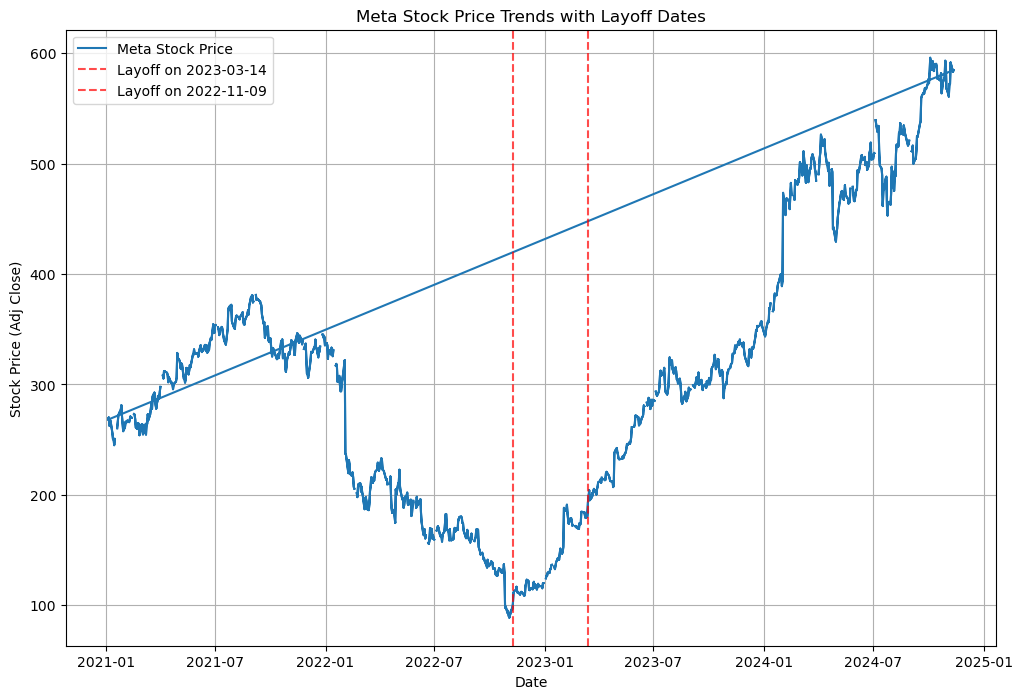

In [45]:
import matplotlib.pyplot as plt

# Ensure `merged_data` is properly created and includes layoff and stock price information
# Filter data for a specific company, e.g., Meta
company_name = "Meta"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\1818459149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\1818459149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


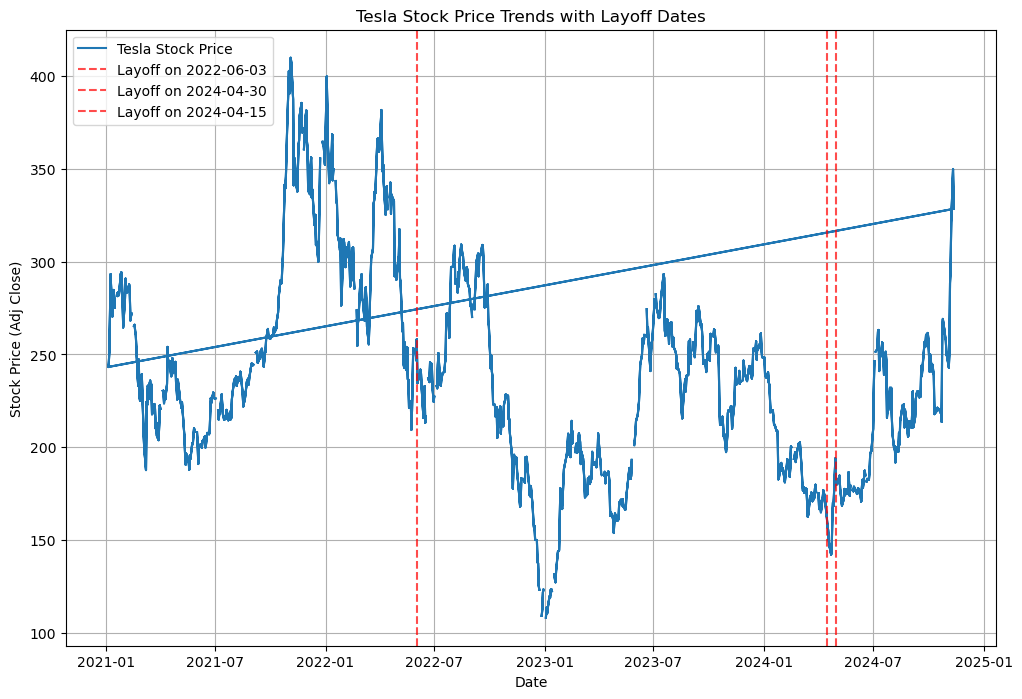

In [47]:
# Filter data for a specific company, e.g., Meta
company_name = "Tesla"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\3895176162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\3895176162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


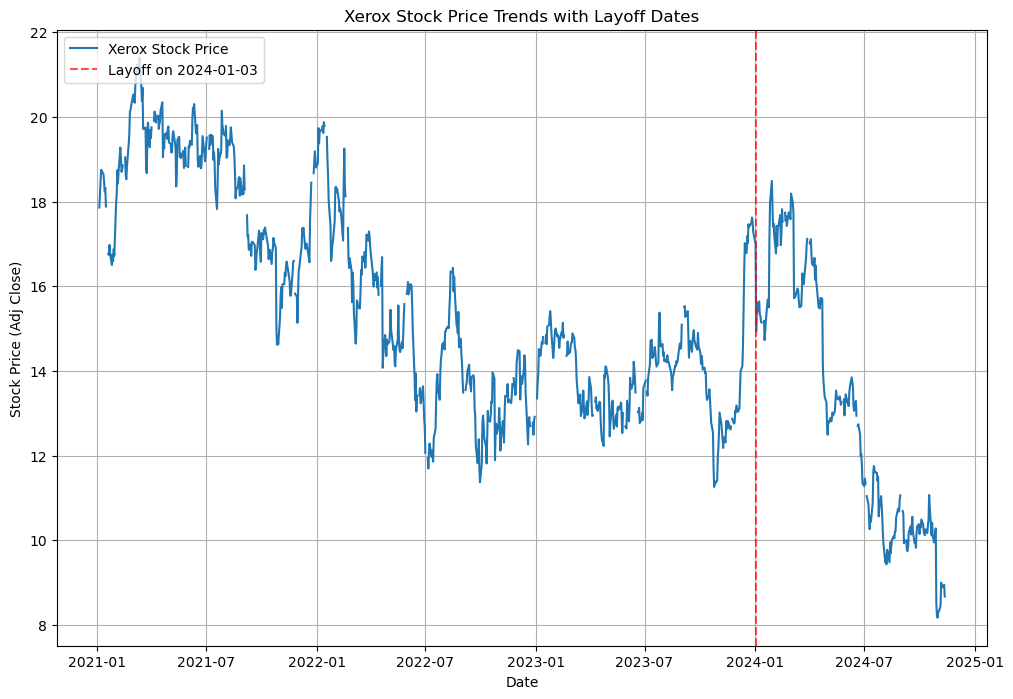

In [49]:
# Filter data for a specific company, e.g., Meta
company_name = "Xerox"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2149375981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2149375981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


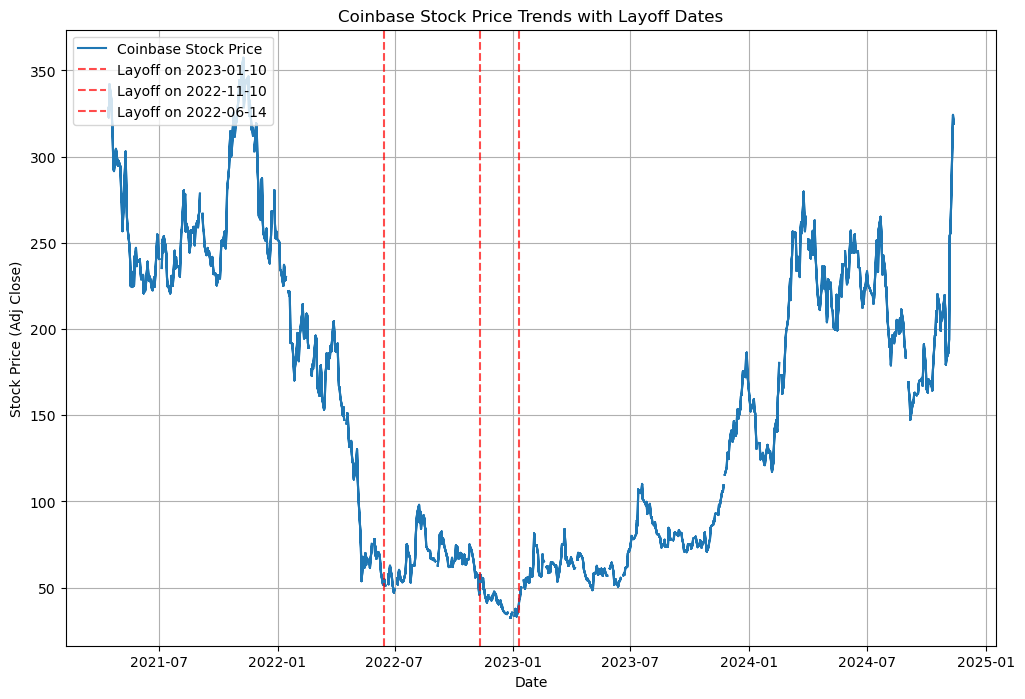

In [51]:
# Filter data for a specific company, e.g., Meta
company_name = "Coinbase"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\1001535860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\1001535860.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


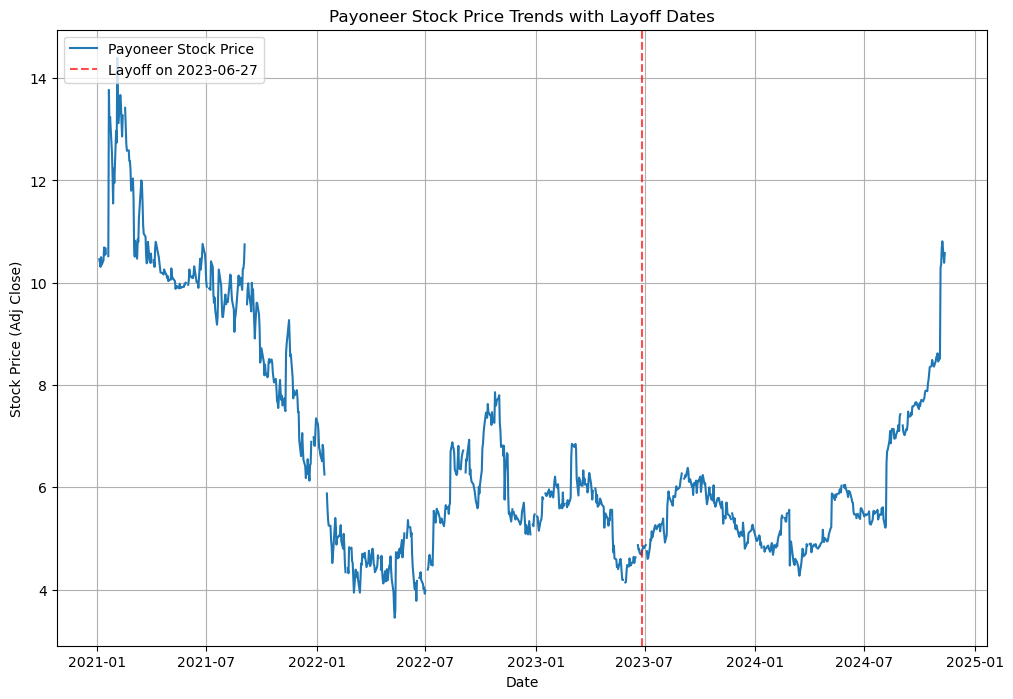

In [53]:
# Filter data for a specific company, e.g., Meta
company_name = "Payoneer"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2773856336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2773856336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


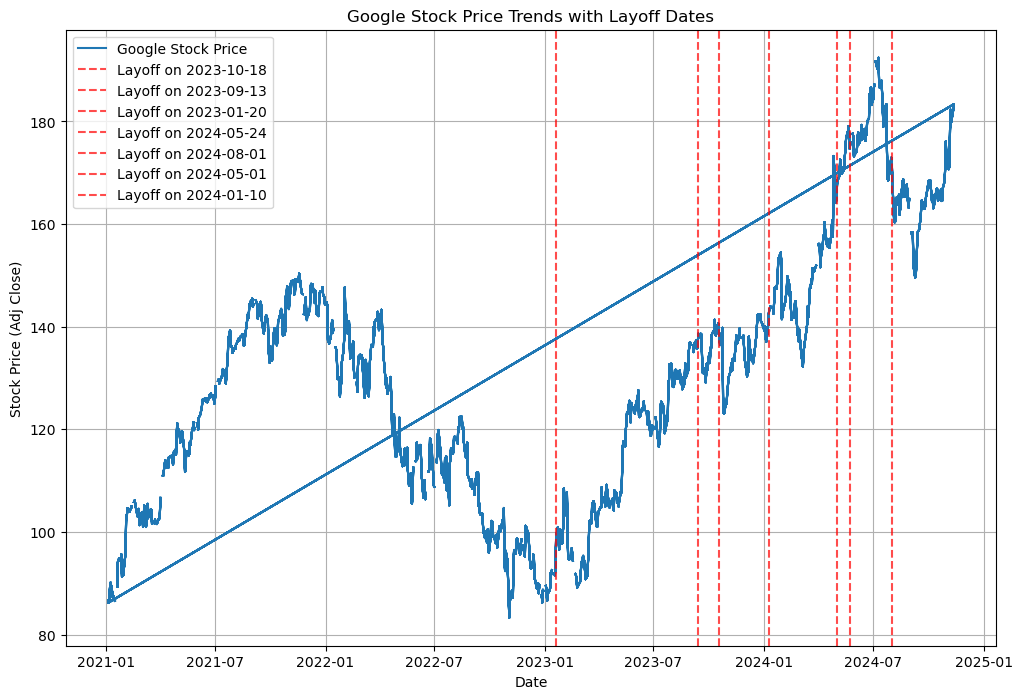

In [55]:
# Filter data for a specific company, e.g., Meta
company_name = "Google"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\16993434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\16993434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


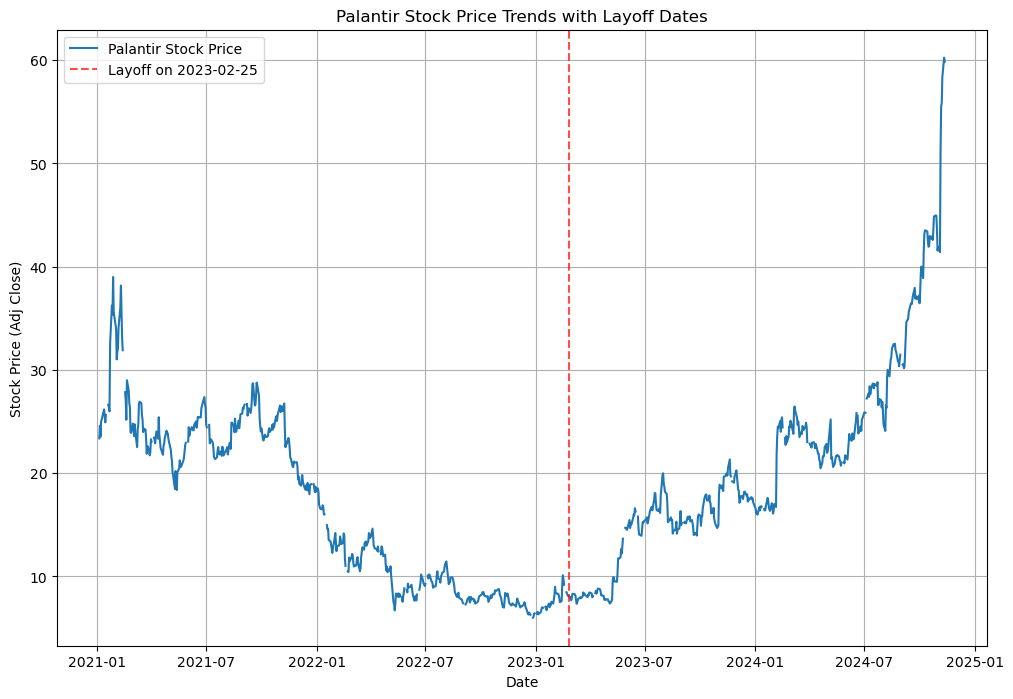

In [71]:
# Filter data for a specific company, e.g., Meta
company_name = "Palantir"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\72162970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\72162970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


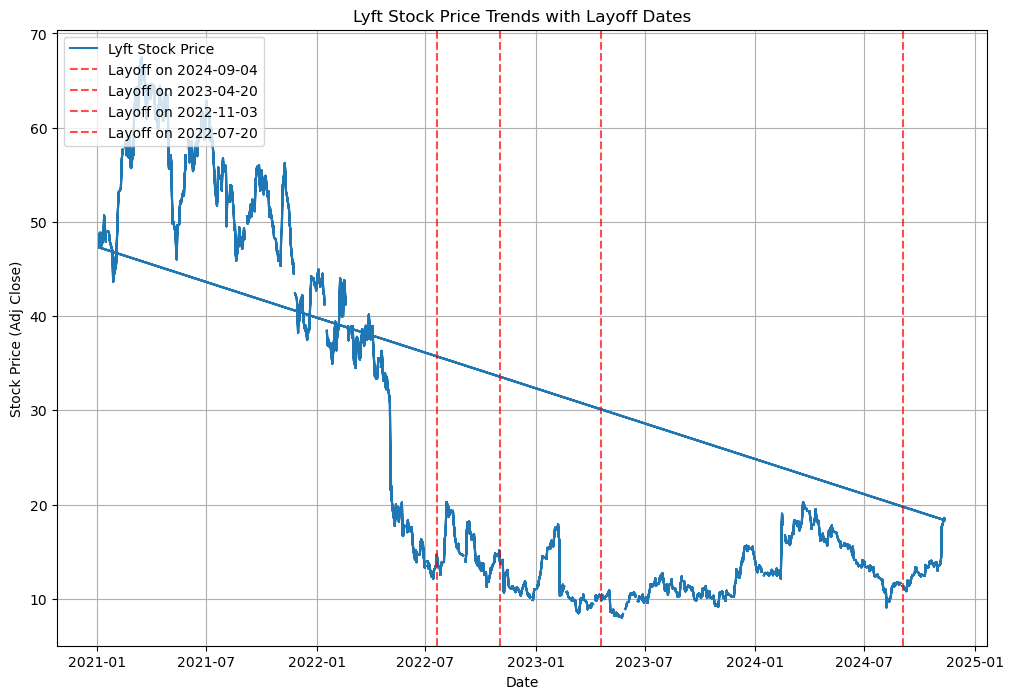

In [69]:
# Filter data for a specific company, e.g., Meta
company_name = "Lyft"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2186542796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2186542796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


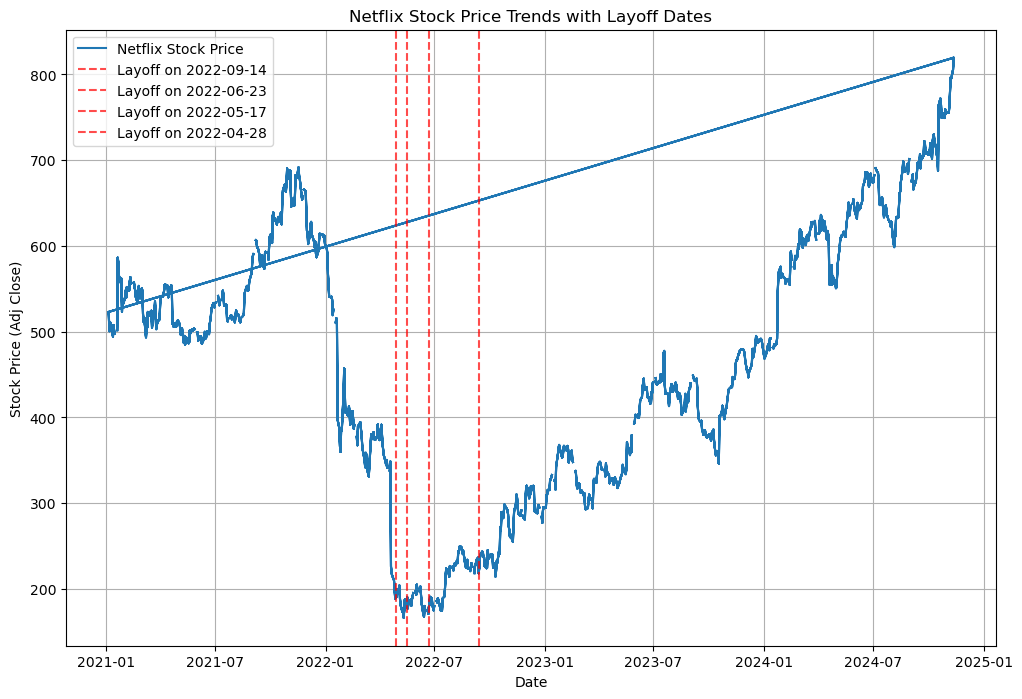

In [61]:
# Filter data for a specific company, e.g., Meta
company_name = "Netflix"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2412620992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\2412620992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


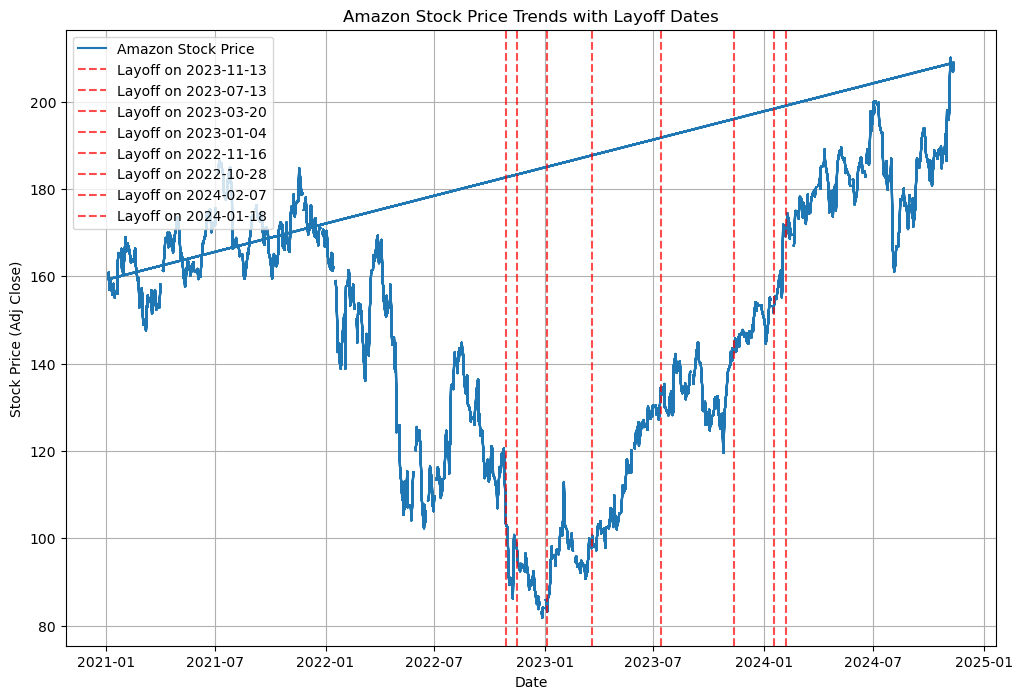

In [63]:
# Filter data for a specific company, e.g., Meta
company_name = "Amazon"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

C:\Users\27311\AppData\Local\Temp\ipykernel_7624\357057443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
C:\Users\27311\AppData\Local\Temp\ipykernel_7624\357057443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date


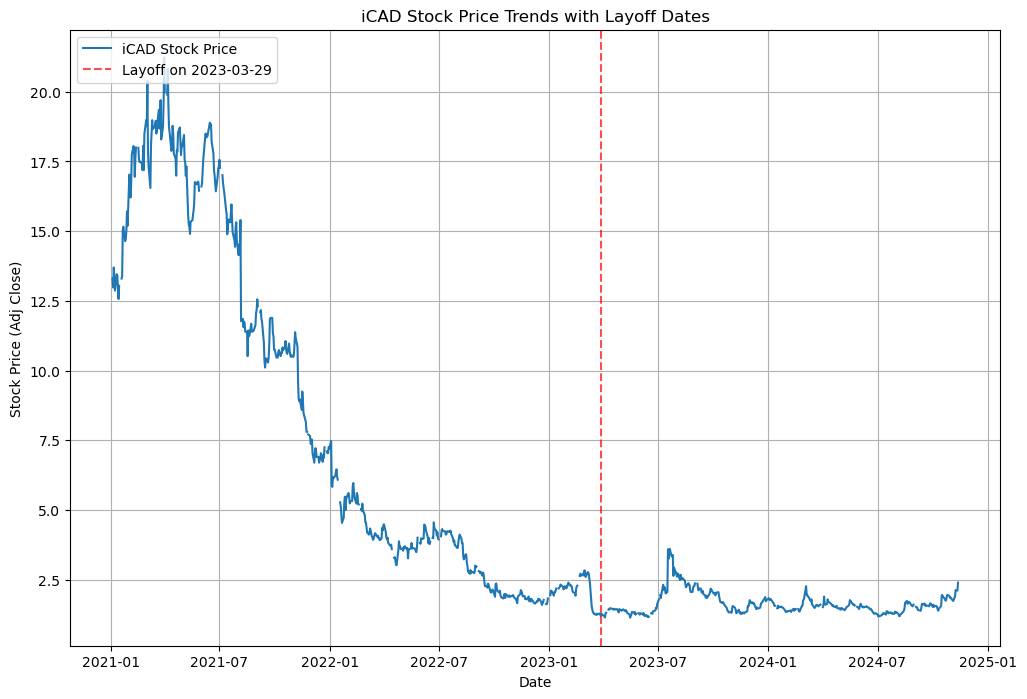

In [65]:
# Filter data for a specific company, e.g., Meta
company_name = "iCAD"
company_data = merged_data[merged_data['Company'] == company_name]

# Convert dates to datetime format for proper plotting
company_data['Date_y'] = pd.to_datetime(company_data['Date_y'])  # Stock date
company_data['Date_x'] = pd.to_datetime(company_data['Date_x'])  # Layoff date

# Plot the stock price trend
plt.figure(figsize=(12, 8))
plt.plot(company_data['Date_y'], company_data['Value'], label=f"{company_name} Stock Price")

# Highlight layoff dates
layoff_dates = company_data['Date_x'].unique()
for date in layoff_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=f"Layoff on {date.date()}")

# Add title, labels, and legend
plt.title(f"{company_name} Stock Price Trends with Layoff Dates")
plt.xlabel("Date")
plt.ylabel("Stock Price (Adj Close)")
plt.legend(loc="upper left")
plt.grid()
plt.show()